# Lennart Vetter, Wongee Hong, Myisha Hassan

Assignment 5: Expectation Maximization

Implement EM on a Gaussian mixture model in 1 and 2 dimensions.

- For the 1-D case, use K = 3, the choice of means, covariance and pi is up to you.  The algorithm is laid out explicitly in equations 9.23-9.28.
- Produce a plot that shows a histogram of your generated observations, and overlay on that histogram the pdf you found. Plot this at algorithm init, and a couple other times as the algorithm converges. *If you feel ambitious make a movie. If you want to see the algorithm break, artificially introduce a data point that exactly equals one of the means of the distribution.*
- For 2-D, create a plot similar to 9.8. Use the old faitfhul dataset and K = 2.

### 1D Gaussian Mixture Model with EM Algorithm

Generated 1000 data points from 3 Gaussians
True means: [-2, 1, 4]
True variances: [0.5, 1.0, 0.8]
True weights: [0.3, 0.5, 0.2]
Initial means: [-1.  0.  3.]
Initial variances: [1. 1. 1.]
Initial weights: [0.33 0.33 0.34]
Initial log-likelihood (iter 0): -2373.8340


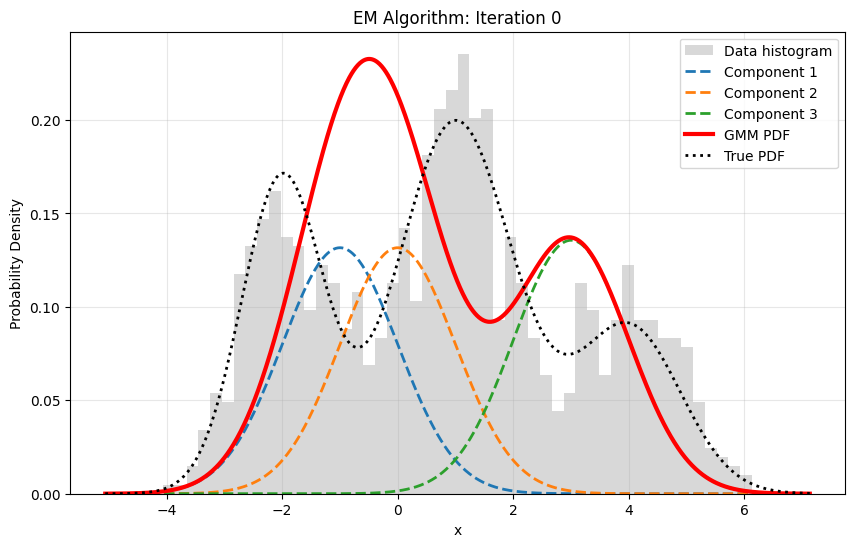

Iter 1: log_likelihood=-2240.2958


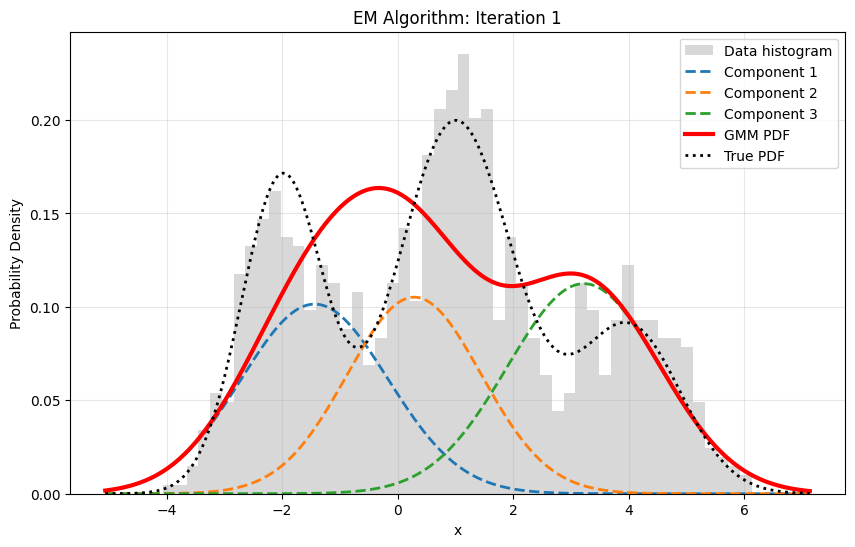

Iter 2: log_likelihood=-2228.9246


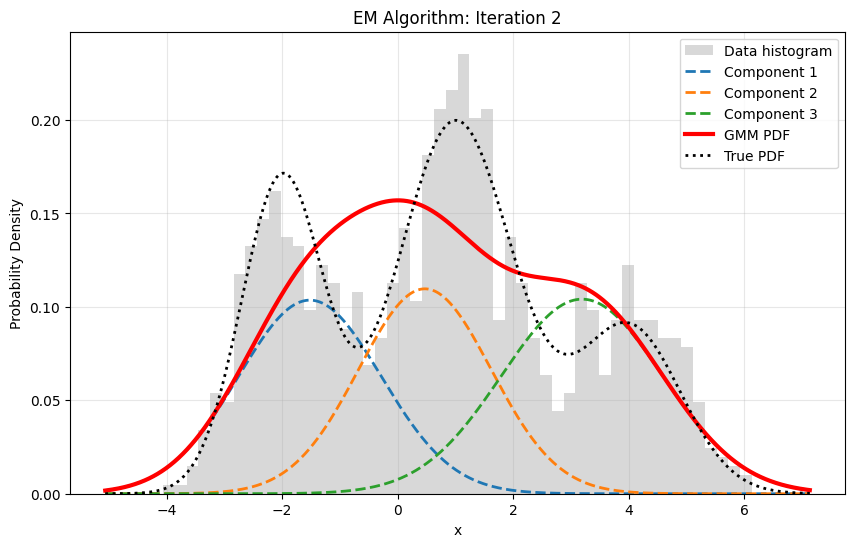

Iter 3: log_likelihood=-2218.5165
Iter 4: log_likelihood=-2205.6136
Iter 5: log_likelihood=-2191.5716


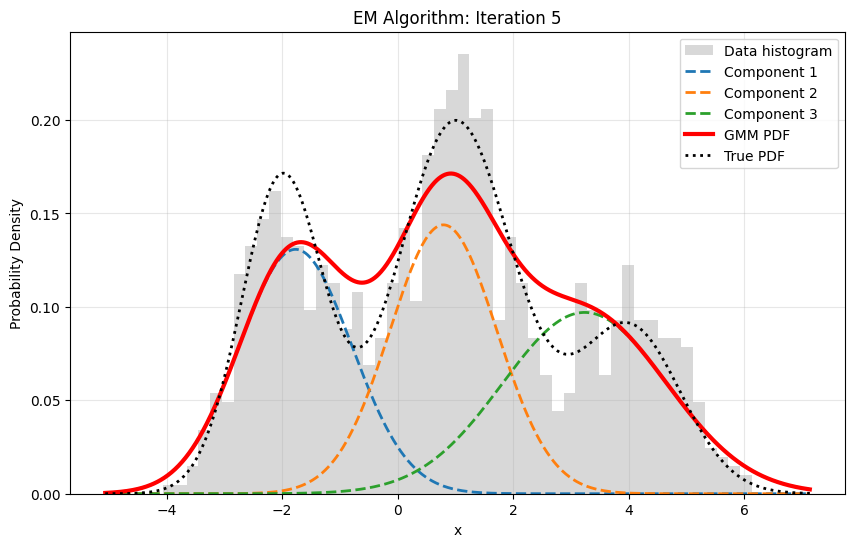

Iter 6: log_likelihood=-2180.6403
Iter 7: log_likelihood=-2174.8390
Iter 8: log_likelihood=-2172.1835
Iter 9: log_likelihood=-2170.6523
Iter 10: log_likelihood=-2169.4562


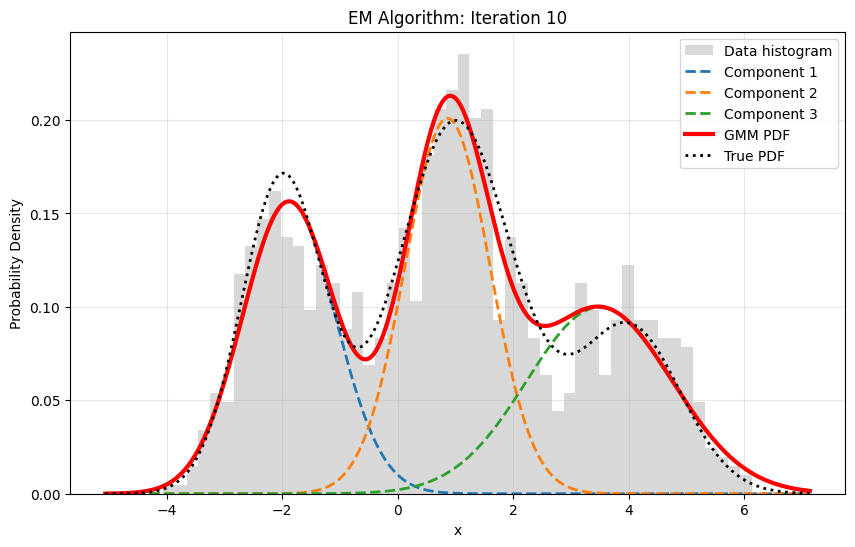

Iter 11: log_likelihood=-2168.3654
Iter 12: log_likelihood=-2167.3169
Iter 13: log_likelihood=-2166.2980
Iter 14: log_likelihood=-2165.3127
Iter 15: log_likelihood=-2164.3703
Iter 16: log_likelihood=-2163.4816
Iter 17: log_likelihood=-2162.6566
Iter 18: log_likelihood=-2161.9033
Iter 19: log_likelihood=-2161.2275
Iter 20: log_likelihood=-2160.6314


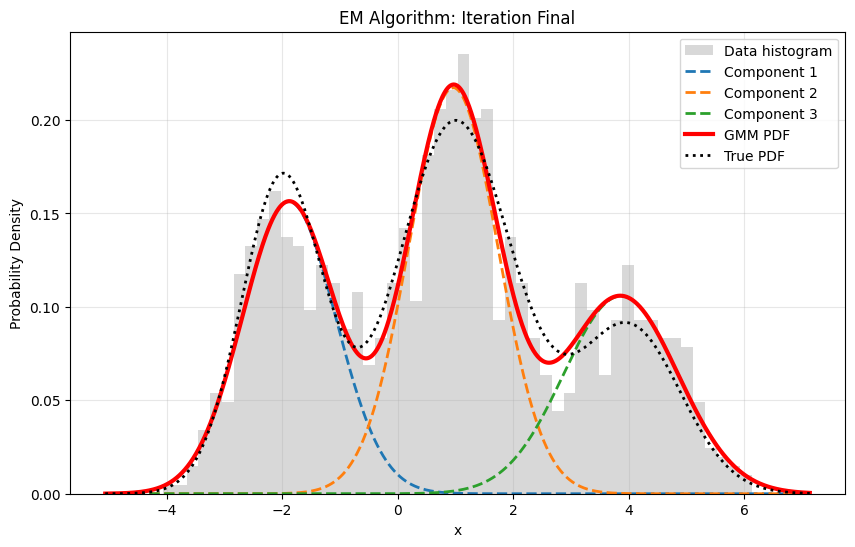


 Comparison with True Parameters
Mean 1: true=-2.0000 est=-1.8829
Mean 2: true=1.0000 est=0.9603
Mean 3: true=4.0000 est=3.8596
Var  1: true=0.5000 est=0.6504
Var  2: true=1.0000 est=0.6008
Var  3: true=0.8000 est=0.9762
Weight 1: true=0.3000 est=0.3160
Weight 2: true=0.5000 est=0.4221
Weight 3: true=0.2000 est=0.2619


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import logsumexp

np.random.seed(0)

# Generate sample data from a true GMM
# True parameters for 3 component GMM
true_means = [-2, 1, 4]           # Means/centers of the three Gaussian curves
true_variances = [0.5, 1.0, 0.8]  # Variances (sigma^2) - how wide each bell curve is
true_weights = [0.3, 0.5, 0.2]    # Mixing coefficients (pi_k) - how much each bell curve contributes

K = 3     # Number of components
N = 1000  # Number of data points

# Generate the data by randomly picking which Gaussian to sample from
data_1d = []
for _ in range(N):
    # Choose which Gaussian component to sample from based on weights
    k = np.random.choice(3, p=true_weights)
    # Sample one point from the chosen Gaussian
    sample = np.random.normal(true_means[k], np.sqrt(true_variances[k]))
    data_1d.append(sample)

data_1d = np.array(data_1d)

print(f"Generated {N} data points from 3 Gaussians")
print(f"True means: {true_means}")
print(f"True variances: {true_variances}")
print(f"True weights: {true_weights}")

# Make initial guesses for our parameters randomly

# Initialize parameters (we'll pretend we don't know the true values and improve with EM)
means = np.array([-1.0, 0.0, 3.0])      # Initial guess where the centers are
variances = np.array([1.0, 1.0, 1.0])   # Initial guess how wide they are
weights = np.array([0.33, 0.33, 0.34])  # Initial guess how much each contributes

print(f"Initial means: {means}")
print(f"Initial variances: {variances}")
print(f"Initial weights: {weights}")

# Initial log-likelihood
def compute_ll_1d(data, means, variances, weights):
    ll = 0.0
    for n in range(len(data)):
        mix = 0.0
        for k in range(K):
            mix += weights[k] * norm.pdf(data[n], means[k], np.sqrt(variances[k]))
        ll += np.log(mix + 1e-300)  # epsilon for stability
    return ll

history = {
    'means': [means.copy()],
    'variances': [variances.copy()],
    'weights': [weights.copy()],
    'log_likelihood': []
}

ll0 = compute_ll_1d(data_1d, means, variances, weights)
history['log_likelihood'].append(ll0)
log_likelihood_old = ll0
print(f"Initial log-likelihood (iter 0): {ll0:.4f}")

# Implement the EM algorithm

# Function to plot our current understanding of the data
def plot_current_state(iteration, data, means, variances, weights, true_params=None):
    """Plot the current state of the GMM and how it looks like"""
    plt.figure(figsize=(10, 6))

    # Plot histogram of data
    plt.hist(data, bins=50, density=True, alpha=0.3, color='gray', label='Data histogram')

    # Plot individual Gaussian components
    x_plot = np.linspace(data.min()-1, data.max()+1, 1000)
    for k in range(K):
        # Plot each Gaussian component weighted by its mixing coefficient
        component_pdf = weights[k] * norm.pdf(x_plot, means[k], np.sqrt(variances[k]))
        plt.plot(x_plot, component_pdf, '--', linewidth=2, label=f'Component {k+1}')

    # Plot the full GMM PDF (sum of all Gaussian components)
    full_pdf = np.zeros_like(x_plot)
    for k in range(K):
        full_pdf += weights[k] * norm.pdf(x_plot, means[k], np.sqrt(variances[k]))
    plt.plot(x_plot, full_pdf, 'r-', linewidth=3, label='GMM PDF')

    # Plot the true distribution for comparison (if we know it)
    if true_params is not None:
        true_pdf = np.zeros_like(x_plot)
        for k in range(K):
            true_pdf += true_params['weights'][k] * norm.pdf(x_plot, true_params['means'][k], np.sqrt(true_params['variances'][k]))
        plt.plot(x_plot, true_pdf, 'k:', linewidth=2, label='True PDF')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title(f'EM Algorithm: Iteration {iteration}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot initial state (bad guess)
plot_current_state(0, data_1d, means, variances, weights,
                  {'means': true_means, 'variances': true_variances, 'weights': true_weights})

# EM algorithm parameters to learn true distribution
max_iterations = 20
tolerance = 1e-6

for iteration in range(max_iterations):
    # E-step: Compute responsibilities (Equation 9.23)
    # Responsibility gamma(z_nk) = probability that data point n belongs to component k

    log_resp = np.empty((N, K))
    for k in range(K):
        # log pi_k + log N(x | mu_k, var_k)
        log_resp[:, k] = np.log(weights[k] + 1e-300) + \
                        norm.logpdf(data_1d, means[k], np.sqrt(variances[k]))

    log_norm = logsumexp(log_resp, axis=1, keepdims=True)  # denominator in log-space
    responsibilities = np.exp(log_resp - log_norm)         # normalized responsibilities


    # M-step: Update parameters (Equations 9.24, 9.25, 9.26)

    # Compute effective number of points in each component (Equation 9.27)
    N_k = np.sum(responsibilities, axis=0)

    # Update means (Equation 9.24)
    for k in range(K):
        means[k] = np.sum(responsibilities[:, k] * data_1d) / N_k[k]

    # Update variances (Equation 9.25)
    for k in range(K):
        # variance = E[(x - mu)^2]
        squared_diff = (data_1d - means[k]) ** 2
        variances[k] = np.sum(responsibilities[:, k] * squared_diff) / N_k[k]
        variances[k] = max(variances[k], 1e-6)  # variance floor to avoid collapse

    # Update weights (mixing coefficients) (Equation 9.26)
    weights = N_k / N

    # Compute log-likelihood to check convergence
    log_likelihood = 0
    for n in range(N):
        point_likelihood = 0
        for k in range(K):
            point_likelihood += weights[k] * norm.pdf(data_1d[n], means[k], np.sqrt(variances[k]))
        log_likelihood += np.log(point_likelihood + 1e-300) #eplison to avoid log(0)

    history['means'].append(means.copy())
    history['variances'].append(variances.copy())
    history['weights'].append(weights.copy())
    history['log_likelihood'].append(log_likelihood)
    print(f"Iter {iteration+1}: log_likelihood={log_likelihood:.4f}")

    # Check for convergence
    if abs(log_likelihood - log_likelihood_old) < tolerance:
        print(f"\nConverged after {iteration + 1} iterations!")
        break

    log_likelihood_old = log_likelihood

    # Plot at specific iterations
    if iteration + 1 in [1, 2, 5, 10]:
        plot_current_state(iteration + 1, data_1d, means, variances, weights,
                          {'means': true_means, 'variances': true_variances, 'weights': true_weights})

# Final plot
plot_current_state("Final", data_1d, means, variances, weights,
                  {'means': true_means, 'variances': true_variances, 'weights': true_weights})

# print comparison
print("\n Comparison with True Parameters")
for k in range(K):
    print(f"Mean {k+1}: true={true_means[k]:.4f} est={means[k]:.4f}")
for k in range(K):
    print(f"Var  {k+1}: true={true_variances[k]:.4f} est={variances[k]:.4f}")
for k in range(K):
    print(f"Weight {k+1}: true={true_weights[k]:.4f} est={weights[k]:.4f}")

### 2D Gaussian Mixture Model with EM Algorithm

This uses the old faithful dataset of seismic eruptions from https://gist.github.com/curran/4b59d1046d9e66f2787780ad51a1cd87


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal
from scipy.special import logsumexp
import os


def load_data():
    filepath = 'https://gist.githubusercontent.com/curran/4b59d1046d9e66f2787780ad51a1cd87/raw/9ec906b78a98cf300947a37b56cfe70d01183200/data.tsv'
    data = np.loadtxt(filepath, skiprows=1, usecols=(0, 1))
    return data

def compute_ll(data, means, covariances, weights):
    N, D = data.shape
    ll = 0.0
    log_component_likelihoods = np.empty((N, K))
    for k in range(K):
      log_component_likelihoods[:, k] = np.log(weights[k] + 1e-300) + \
          multivariate_normal.logpdf(data, mean=means[k], cov=covariances[k])

    # Sum of log(sum_k (pi_k * N(x_n | ...)))
    ll = np.sum(logsumexp(log_component_likelihoods, axis=1))
    return ll


def plot_gmm(iteration, data, means, covariances, weights, responsibilities=None):
    """Plots the 2D data, the current GMM means, and the 95% confidence ellipses."""

    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(
        data[:, 0],
        data[:, 1],
        c=responsibilities[:, 0],
        cmap='seismic',
        s=30,
        alpha=0.7,
        edgecolors='black',
        linewidths=0.2,
    )
    cbar = fig.colorbar(
        scatter,
        ax=ax,
        label='Responsibility for Cluster 1',
    )


    # Plot the Covariance Ellipses
    colors = ['r', 'b', 'g', 'm', 'y'] # Colors for the ellipses

    for k in range(K):
        cov = covariances[k]

        # Calculate eigenvalues and eigenvectors of th-e covariance matrix
        eigenvals, eigenvecs = np.linalg.eigh(cov)

        # Angle of rotation for the ellipse (angle of the largest eigenvector)
        angle = np.degrees(np.arctan2(*eigenvecs[:, 0][::-1]))

        # Calculate the major and minor axis lengths
        chi2_val = 5.991 #95% confidence interval,
        width, height = 2 * np.sqrt(chi2_val * eigenvals)

        # Create and add Ellipse
        ellipse = Ellipse(
            xy=means[k],
            width=width,
            height=height,
            angle=angle,
            edgecolor=colors[k % len(colors)],
            facecolor='none',
            linestyle='-',
            linewidth=3,
            alpha=1.0,
        )
        ax.add_patch(ellipse)
        ax.plot(
            means[k][0],
            means[k][1],
            'x',
            color=colors[k % len(colors)],
            markersize=10,
            markeredgewidth=3,
            label=f'Mean {k+1}',
        )

    ax.set_xlabel('Eruption Duration (minutes)')
    ax.set_ylabel('Waiting Time (minutes)')
    ax.set_title(f'2D GMM EM Algorithm: Iteration {iteration}')
    ax.grid(True, alpha=0.3)
    plt.show()

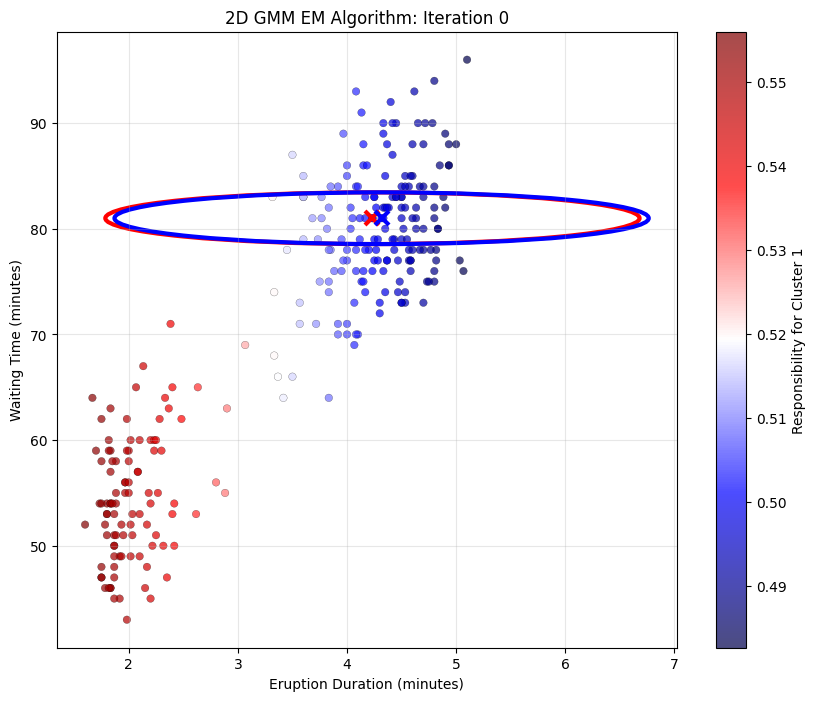

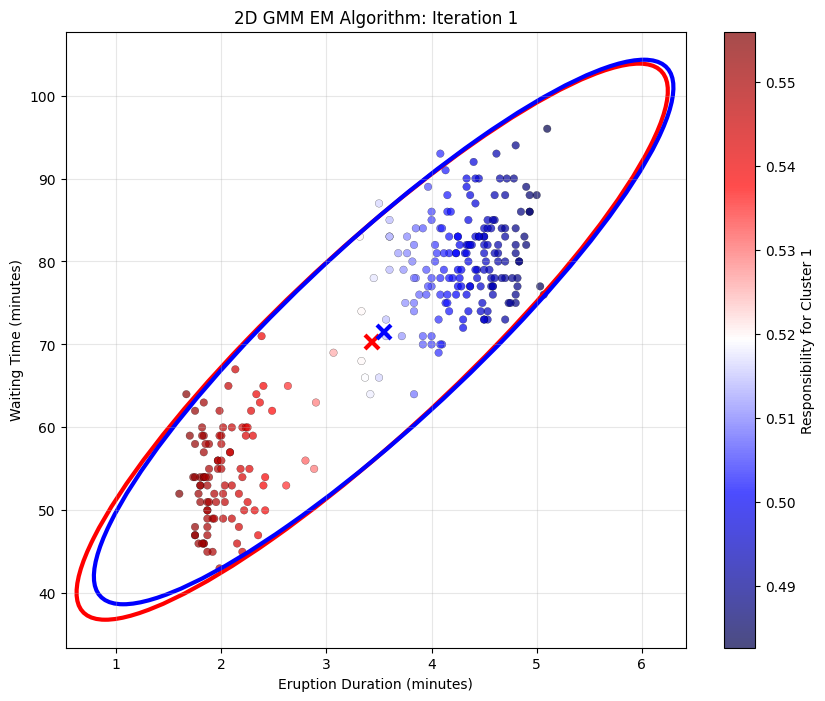

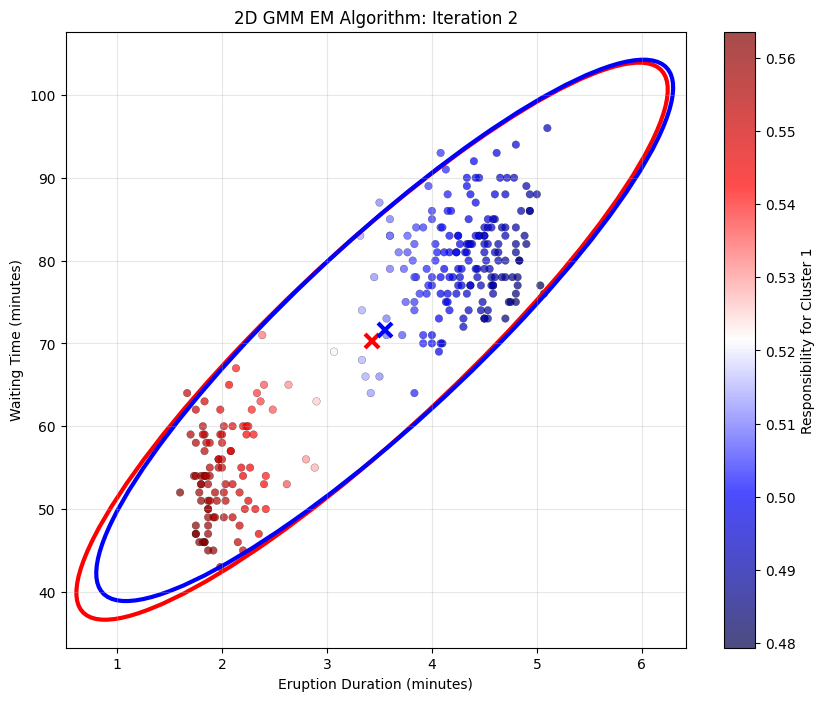

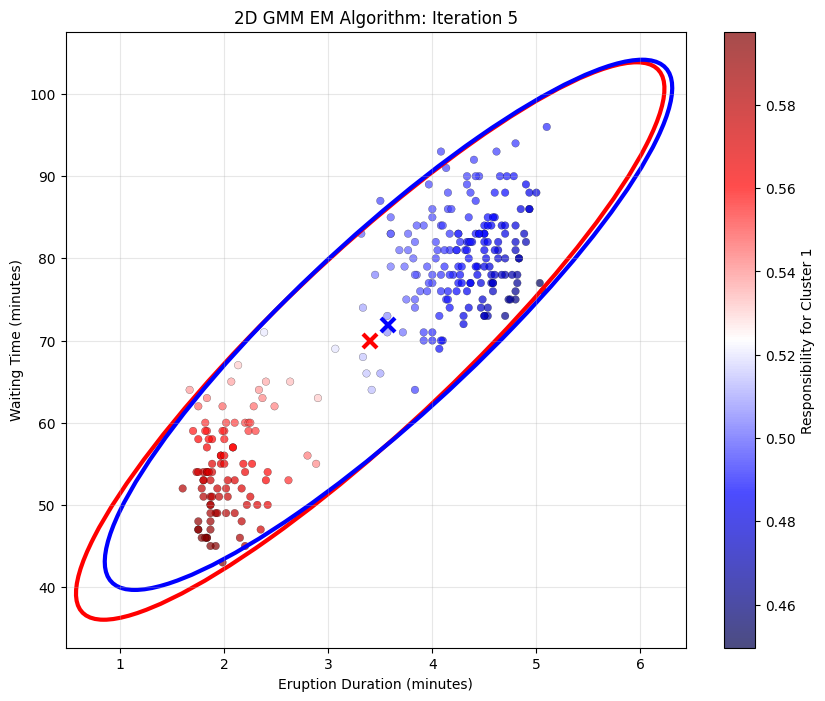


Converged after 29 iterations.


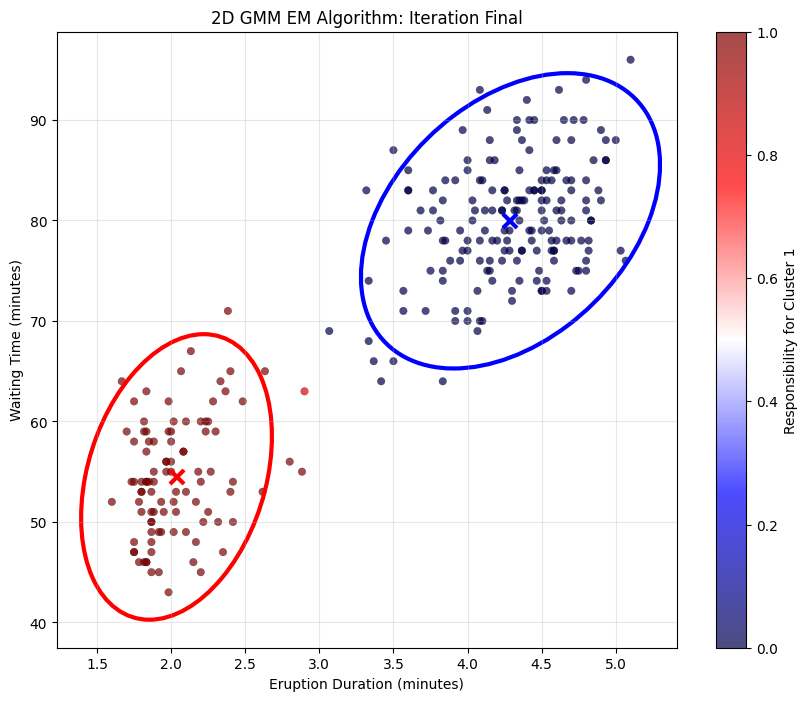

In [ ]:
# Config
K = 2  # Number of components, as requested for Old Faithful
MAX_ITERATIONS = 50
TOLERANCE = 1e-5

# Training Loop
# Load Data
data_2d = load_data()
N, D = data_2d.shape # N number of points, D dimension

# Init Parameters

# Init means randomly
# Init covariance matrices as identity matrices * a small scalar, implies initial spherical components
# Init weights equally
random_indices = np.random.choice(N, K, replace=False)
means = data_2d[random_indices, :].copy()
covariances = np.array([np.eye(2) * 1.0]* 2)
weights = np.array([0.5, 0.5])

history = {
    'means': [means.copy()],
    'covariances': [covariances.copy()],
    'weights': [weights.copy()],
    'log_likelihood': []
}

# Initial log-likelihood calculation
ll0 = compute_ll(data_2d, means, covariances, weights)
history['log_likelihood'].append(ll0)
log_likelihood_old = ll0

# Initial E-step to get responsibilities
log_resp = np.empty((N, K))
for k in range(K):
    log_resp[:, k] = np.log(weights[k] + 1e-300) + \
                     multivariate_normal.logpdf(data_2d, mean=means[k], cov=covariances[k])
log_norm = logsumexp(log_resp, axis=1, keepdims=True)
responsibilities = np.exp(log_resp - log_norm)

# Plot initial state
plot_gmm(0, data_2d, means, covariances, weights, responsibilities)


# EM Algorithm Loop
for iteration in range(MAX_ITERATIONS):
    # E-step: Compute responsibilities gamma(z_nk)

    log_resp = np.empty((N, K))
    for k in range(K):
        # log pi_k + log N(x | mu_k, Sigma_k)
        log_resp[:, k] = np.log(weights[k] + 1e-300) + \
                         multivariate_normal.logpdf(data_2d, mean=means[k], cov=covariances[k])

    log_norm = logsumexp(log_resp, axis=1, keepdims=True)  # Denominator in log-space
    responsibilities = np.exp(log_resp - log_norm)         # Normalized responsibilities


    # M-step: Update parameters

    # Compute effective number of points in each component (N_k)
    N_k = np.sum(responsibilities, axis=0)

    # Update means (mu_k) - Equation 9.24
    for k in range(K):
        # sum(gamma(z_nk) * x_n) / N_k
        # responsibilities[:, k] is (N,) -> use np.newaxis to make it (N, 1) for broadcasting
        weighted_sum = np.sum(responsibilities[:, k, np.newaxis] * data_2d, axis=0)
        means[k] = weighted_sum / N_k[k]

    # Update covariances (Sigma_k) - Equation 9.25
    for k in range(K):
        # Calculate difference (x_n - mu_k)
        diff = data_2d - means[k] # (N, 2)

        # Covariance = 1/N_k * sum(gamma(z_nk) * (x_n - mu_k)(x_n - mu_k)^T)
        # np.dot(responsibilities[:, k] * diff.T, diff) performs the weighted sum of outer products
        weighted_cov = np.dot(responsibilities[:, k] * diff.T, diff) / N_k[k]

        covariances[k] = weighted_cov

        # Add a tiny value to the diagonal for numerical stability (regularization)
        covariances[k] += np.eye(D) * 1e-6

    # Update weights (pi_k) - Equation 9.26
    weights = N_k / N

    # Compute log-likelihood to check convergence
    log_likelihood = compute_ll(data_2d, means, covariances, weights)

    history['means'].append(means.copy())
    history['covariances'].append(covariances.copy())
    history['weights'].append(weights.copy())
    history['log_likelihood'].append(log_likelihood)

    # Check for convergence
    if abs(log_likelihood - log_likelihood_old) < TOLERANCE:
        print(f"\nConverged after {iteration + 1} iterations.")
        break

    log_likelihood_old = log_likelihood

    # Plot Iteration
    if iteration + 1 in [1, 2, 5]:
        plot_gmm(iteration + 1, data_2d, means, covariances, weights, responsibilities)

# Final plot
plot_gmm("Final", data_2d, means, covariances, weights, responsibilities)